In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
%matplotlib inline
import math

In [2]:
data = pd.read_excel("C:/Data Sets/(Class 9-Python - Case Study)/2.Credit Card/Credit Card Data.xlsx")
custacq = pd.read_csv("C:/Data Sets/(Class 9-Python - Case Study)/2.Credit Card/Customer_Acqusition.csv")
repayment = pd.read_csv("C:/Data Sets/(Class 9-Python - Case Study)/2.Credit Card/Repayment.csv")
spend = pd.read_csv("C:/Data Sets/(Class 9-Python - Case Study)/2.Credit Card/spend.csv")

In [3]:
custacq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
# 1(a) In case age is less than 18, replace it with mean of age values.



In [5]:
custacq.Age[custacq.Age < 18]  = custacq.Age.mean()

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
custacq
cust = pd.merge(left= repayment,right = spend , how= 'inner', left_on = ['Customer','Month','SL No:'] , right_on=[ 'Customer','Month','Sl No:'] ,suffixes=('re','sp'))
#cust = pd.merge(left= repayment,right = spend , how= 'left', left_on = 'Customer' , right_on= 'Customer' ,suffixes=('re','sp'))

In [7]:
#Removing the irelevant columns for better data organisation.

cust.drop(columns = ['Unnamed: 4'])

cust_final = pd.merge(left = cust, right =custacq, how ='left', left_on='Customer',right_on='Customer')
#cust_final

In [8]:
cust_final.drop(columns = ['Unnamed: 4'], inplace = True)

In [9]:
# 1(b) b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
#(customer’s limit provided in acquisition table is the per transaction limit on his card)

cust_final.Amountsp[cust_final.Amountsp > cust_final.Limit]=0.5 * cust_final.Limit

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
#c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

cust_final.Amountre[cust_final.Amountre > cust_final.Limit] = cust_final.Limit

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#2. From the above dataset create the following summaries:

#a. How many distinct customers exist?

a = cust_final.drop_duplicates(subset = 'Customer').count()
print(" Distinct customers:", a.Customer)

 Distinct customers: 100


In [12]:
#b. How many distinct categories exist?

b = cust_final.drop_duplicates(subset = 'Type').count()
print(" Distinct categories:", b.Type)

 Distinct categories: 15


In [13]:
#c. What is the average monthly spend by customers?

print("Average monthly spend by customers: ",cust_final.Amountsp.mean())

Average monthly spend by customers:  133013.14705882355


In [14]:
#d. What is the average monthly repayment by customers?

cust_final.Amountre.mean()
print("Average monthly repayment by customers:",cust_final.Amountre.mean())

Average monthly repayment by customers: 162760.78986928108


In [15]:
#e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. 
#Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


cust_final['Profit'] = cust_final.Amountre-cust_final.Amountsp
cust_final['Profit'] = np.where( (cust_final.Amountre-cust_final.Amountsp)> 0,  (cust_final.Amountre - cust_final.Amountsp) * 0.029, cust_final.Profit)

cust_final

#Interest only earned where we have posiitve profits.

,SL No:,Customer,Month,Amountre,Sl No:,Type,Amountsp,No,Age,City,Product,Limit,Company,Segment,Profit
0,2.0,A1,3-Jan-04,245899.02,2,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,-164657.11000
1,3.0,A1,15-Jan-04,259490.06,3,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,6836.73840
2,4.0,A1,25-Jan-04,437555.12,4,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,-46787.35000
3,5.0,A1,17-Jan-05,165972.88,5,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,-203721.19000
4,6.0,A1,23-Feb-05,365366.62,6,SANDALS,168285.60,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5715.34958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,220.0,A6,3-Jan-04,100000.00,220,CLOTHES,18162.30,6,70.0,DELHI,Silver,100000.0,C6,Self Employed,2373.29330
149,221.0,A7,15-Jan-04,100001.00,221,CLOTHES,50000.50,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,1450.01450
150,222.0,A8,25-Jan-04,100002.00,222,CLOTHES,50001.00,8,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt,1450.02900
151,559.0,A16,25-Mar-06,472718.78,559,PETRO,395533.64,16,52.0,COCHIN,Gold,500000.0,C16,Normal Salary,2238.36906


In [16]:
#f. What are the top 5 product types?
x = cust_final.groupby('Type').Amountsp.agg(np.sum)
x.sort_values(ascending = False).head()

Type
PETRO         3956474.70
CAMERA        2092932.72
AIR TICKET    1783754.93
SANDALS       1478296.60
SHOPPING      1438043.56
Name: Amountsp, dtype: float64

In [17]:
#g. Which city is having maximum spend?

a = cust_final.groupby('City').Amountsp.agg(np.sum)
a.sort_values(ascending = False).head(1)

City
BANGALORE    5952435.3
Name: Amountsp, dtype: float64

In [18]:
#h. Which age group is spending more money?

b = cust_final.groupby('Age').Amountsp.agg(np.sum)
b.sort_values(ascending = False).head(1)

Age
76.0    2503526.09
Name: Amountsp, dtype: float64

In [19]:
#i. Who are the top 10 customers in terms of repayment?

cust_final.groupby('Customer').Amountre.agg(np.sum).sort_values(ascending = False).head(10)

Customer
A1     2439117.33
A11    1149418.02
A13    1099939.55
A14     876739.12
A10     815913.62
A60     753702.93
A12     624642.58
A16     576642.48
A8      500010.00
A89     497237.97
Name: Amountre, dtype: float64

In [20]:
#3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.
a = pd.to_datetime(cust_final.Month)
cust_final['Year'] = a.dt.year

cust_final['Months'] = a.dt.month

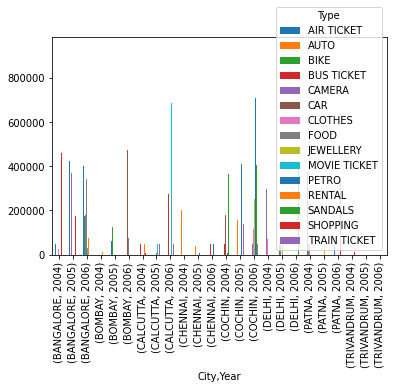

In [21]:
b = cust_final.pivot_table(values = 'Amountsp', columns= ['Type'], index =['City','Year'], aggfunc = np.sum)
b.fillna(value = 0,inplace = True)


#We have some null values for some years, it means there has not been any transaction that year. Therefore, set the null value to zero for calculations.

#cust_final.plot(kind = 'bar', x = 'Year', y = 'Amountsp', figsize = (20, 8))

from matplotlib.pyplot import figure
b.plot(kind='bar')


from pylab import rcParams
rcParams['figure.figsize'] = 12, 10
plt.show()

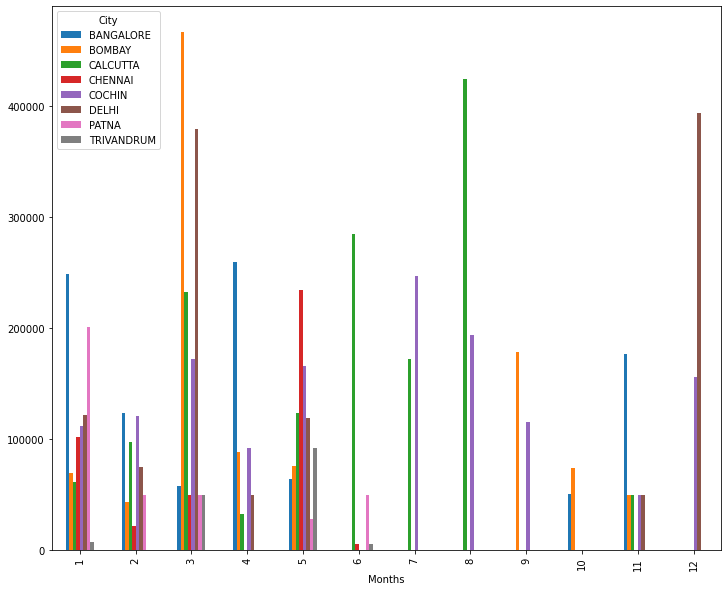

In [22]:
# 4. Create graphs for
#a. Monthly comparison of total spends, city wise

c = cust_final.pivot_table(values = 'Amountsp', index ='Months', columns = 'City')

c.fillna(value = 0,inplace = True)


#cust_final.plot(kind = 'bar', x = 'City', y = 'Amountsp', figsize = (25, 12))
from matplotlib.pyplot import figure
c.plot(kind='bar')
#plt.figure(figsize=(15,10))
#figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

from pylab import rcParams
rcParams['figure.figsize'] = 12, 10
plt.show()

#We have some null values for some years, it means there has not been any transaction that year. Therefore, set the null value to zero for calculations.

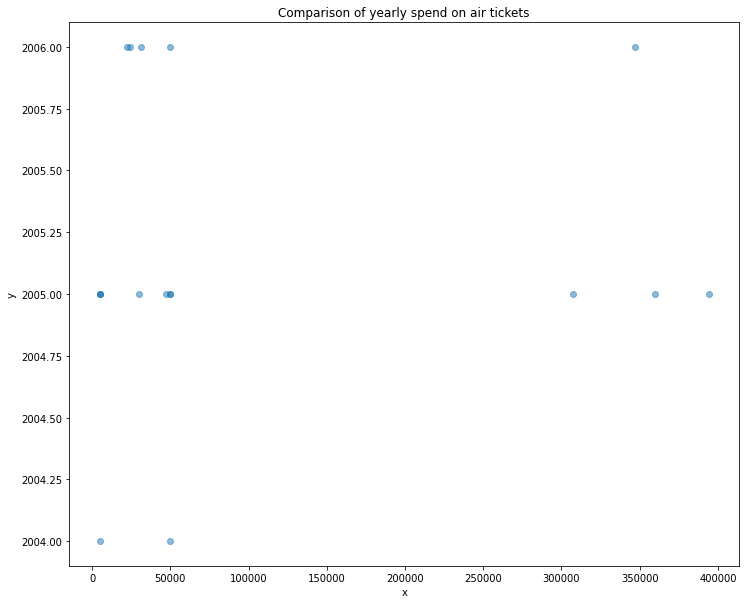

<Figure size 1080x720 with 0 Axes>

In [23]:
#b. Comparison of yearly spend on air tickets
a = cust_final[cust_final.Type == 'AIR TICKET'].Amountsp

b = cust_final[cust_final.Type == 'AIR TICKET'].Year

plt.scatter(a, b, alpha=0.5)
plt.title('Comparison of yearly spend on air tickets')
plt.xlabel('x')
plt.ylabel('y')
plt.figure(figsize=(15,10))

plt.show()

#sns.scatterplot(x = a, y = b, hue = cust_final.Year)

<Figure size 1800x1080 with 0 Axes>

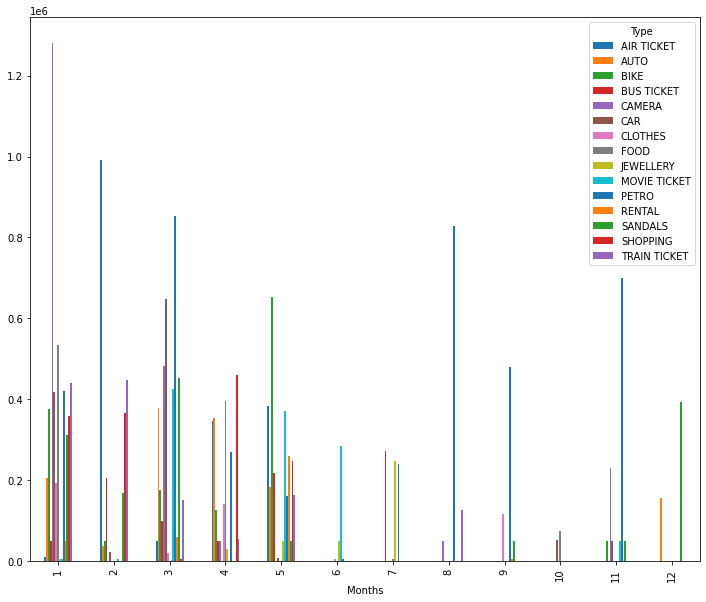

In [24]:
#c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

a = cust_final.pivot_table(values = 'Amountsp', index = 'Months', columns = 'Type', aggfunc = np.sum)

#cust_final.loc[:,['Type','Amountsp','Months']]

#cust_final.plot(kind = 'bar', x = 'City', y = 'Amountsp', figsize = (20, 8))

a.fillna(value = 0,inplace = True)

#plt.bar(a, height= cust_final.Months)
plt.figure(figsize = (25,15))

a.plot(kind='bar')
#sns.barplot(cust_final.Amountsp, cust_final.Months, hue=cust_final.Product)
plt.show()



We see huge amounts of monthly spend in almost all categories in the initial months for all the categories and it reduces monthly.

In [ ]:
#5. Write user defined PYTHON function to perform the following analysis:
#You need to find top 10 customers for each city in terms of their repayment amount by
#different products and by different time periods i.e. year or month. The user should be able
#to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
#function should automatically take these inputs while identifying the top 10 customers.
    
def my_func(product,year):
    #a= cust_final.pivot_table(values = 'Amountre', index = ['City','Year','Customer'], columns = ['Product'], aggfunc = np.sum)
    a = cust_final.groupby(['City','Product','Year','Customer']).Amountre.sum().reset_index()
    b = a[(a.Product == product) & (a.Year == year)]
    return b.sort_values(['City','Amountre'], ascending = [True,False])
my_func('Platinum','2004')